# Home assignment - Non-Neural Machine Learning (ITLB358, MIB)
---
## Task description
You will process real-life data which includes the prices of a digital currency.
- The data represents historical daily time series for a digital currency (BTC) traded on the Saudi market (SAR/Sudi Riyal).
- Prices and volumes are quoted in both SAR & USD.
- Data date range: 11.05.2018 to 30.01.2021

### Your task is as follows:
- What are the steps if the dataset were "big data"?
	- Theoretical question!
	- Please create a code in a markdown cell, which represents a basic big data pipeline (with explicative steps).
	- If you want use pseudo code.
- Download the Digital currency dataset from google drive
	- `!wget "https://drive.google.com/uc?export=download&id=1ogo2n89jpuDPVoA4HXliB15oPF54Ewav" -O "dig_curr.csv"`
- Clean the data as necessary
- Modelling:
	- Regression
		- Linear Regression (baseline)
		- Random forest regressor
		- Split data into inputs and outputs
		- Split data into train and test set
		- Input features:
			- year, open_SAR, open_USD, high_SAR, high_USD, low_SAR, low_USD, close_SAR, volume
		- Output feature(s):
			- close_USD
			- Try to predict 2 different periods (1 day / 2 days ahead) on the test set!
- Reflection
	- Critically evaluate your work, including other approaches.
	- Answer in a markdown cell.


___
# Home Assignement - Predict stock prices using regression
## Step 1 - install necessary libraries
The first step is to install the necessary libraries. In case you are using a Linux distribution or Macintosh use:
```bash
pip3 install numpy pandas matplotlib sklearn pandas_ta
```
in the case that your operating system is Windows use:
```bash
pip install numpy pandas matplotlib sklearn pandas_ta
```
## Step 2 - Visualize the data

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1ogo2n89jpuDPVoA4HXliB15oPF54Ewav" -O "dig_curr.csv"

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [2]:
# generate a seed for reproductibility
random_seed = 69420
np.random.seed(random_seed)

# read the data and clean it
df = pd.read_csv('dc.csv', parse_dates=["Unnamed: 0"])
# rename the un-named column re-index the dataset to the 'date' column
df.rename(columns= {"Unnamed: 0" : "date"}, inplace=True)
df.set_index("date", inplace=True)
# sort the data by date
df.sort_index(ascending=True, inplace=True)
# drop NaN values
df.dropna(inplace=True)
df

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
date,,,,,,,,,
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227
...,...,...,...,...,...,...,...,...,...
2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972
2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621


In [3]:
# inspect the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2018-05-07 to 2021-01-30
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open_SAR   1000 non-null   float64
 1   open_USD   1000 non-null   float64
 2   high_SAR   1000 non-null   float64
 3   high_USD   1000 non-null   float64
 4   low_SAR    1000 non-null   float64
 5   low_USD    1000 non-null   float64
 6   close_SAR  1000 non-null   float64
 7   close_USD  1000 non-null   float64
 8   volume     1000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 78.1 KB
None


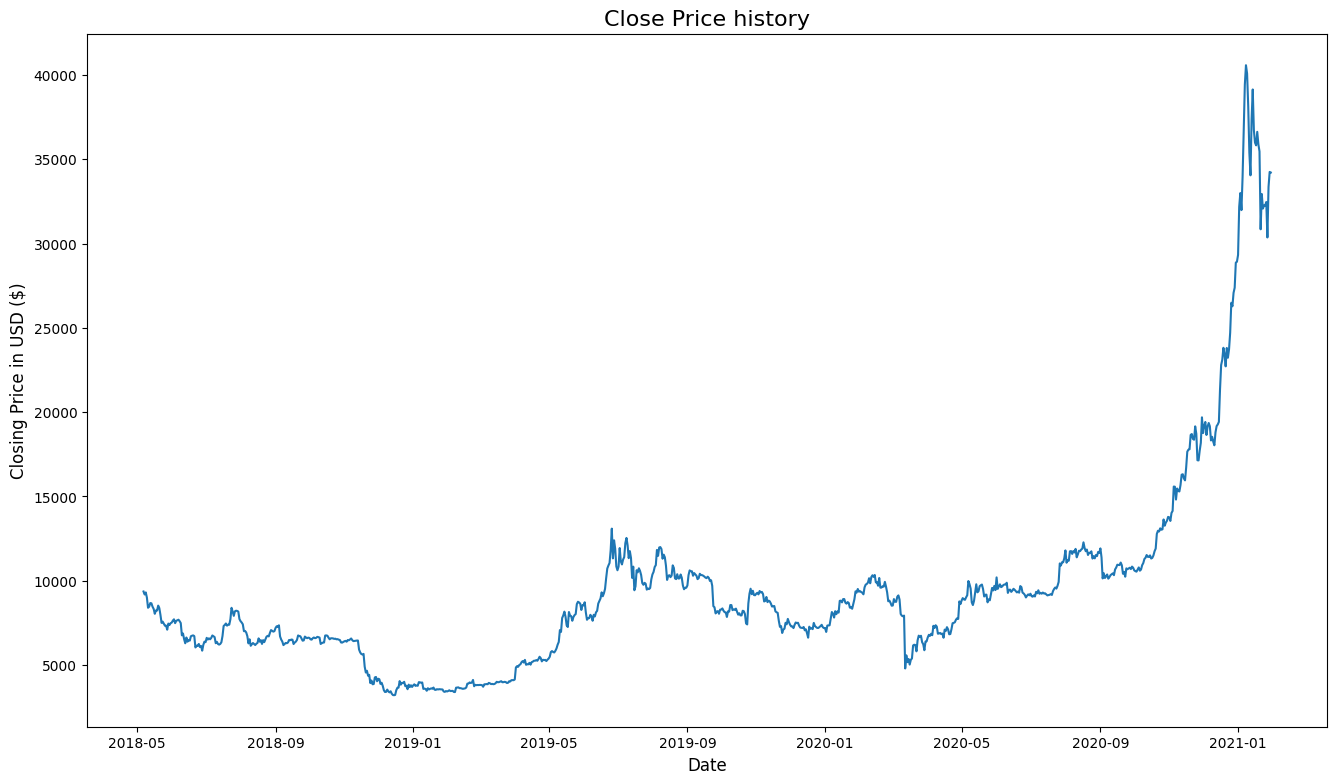

In [4]:
# visualize the data
fig, ax = plt.subplots(figsize=(16,9))
plt.plot(df["close_USD"])
ax.set_title('Close Price history', fontsize = 16)
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price in USD ($)', fontsize = 12)
plt.show()

## Predict Stock Prices 
### Random Forest Regression Model

In [31]:
x = df.loc[:, df.columns != 'close_USD']
y = df['close_USD']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, shuffle=False, random_state=random_seed)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [8]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.3s
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.2s
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.2s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=2; total time=   0.2s
[CV] END bootstrap=True, max_depth=8, min_samples_leaf=13, min_samples_split=10, n_estimators=20, random_state=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=2; total time=   0.2s
[CV] 

In [32]:
# apply the parameters into the model
model = RandomForestRegressor(random_state=1, n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=11, bootstrap=False)

#fit the model
model.fit(x_train, y_train)

# Use model to make predictions
y_pred = model.predict(x_test)

print(y_pred ,'\n')
print('Shape of data:\n-----------------------------------------')
print(y_pred.shape)

[ 9194.76333333  9138.33689     9144.35973667  9175.82855
  9194.43925     9147.74025     9392.52228     9517.4558
  9589.79563     9540.73536     9700.96054     9929.60885
 11067.81408    10881.15364    11067.81408    11067.81408
 11266.55596    11771.99206    11114.31384    11256.49
 11099.17024    11790.503      11766.1687     11707.08424
 11757.22       11757.22       11891.56       11440.90101
 11602.21746    11765.89874    11765.8114     11763.51182
 11798.93242    12190.15444    12100.04655    11850.85404
 11763.2895     11706.88574    11656.911      11600.539
 11757.22       11309.31       11416.0783     11289.11062
 11600.539      11411.64854    11656.911      11700.848
 11981.12875    11468.79354    10142.63       10430.1319
 10167.74185    10248.71962    10373.87482    10134.35
 10223.84746    10329.5456     10379.08572    10441.41202
 10333.25216    10618.83841    10752.35744    10945.79098
 10918.37792    10943.91814    11076.90024    10915.19823
 10446.23468    10541.9234

In [33]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, y_pred), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')

errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 5262.2334
Mean Squared Error: 89285827.5277
Root Mean Squared Error: 9449.1178
(R^2) Score: -0.2101
Train Score : 100.00% and Test Score : -21.01% using Random Tree Regressor.
Accuracy: 80.94 %.


In [17]:
predictions = pd.DataFrame({"Predictions": y_pred}, index=pd.date_range(start=df.index[-1], periods=len(y_pred), freq="D"))
predictions.index.name = 'date'
predictions.to_csv("Predicted-price-data.csv")

twodays_df = pd.DataFrame(predictions[:3])
twodays_df.to_csv("two-days-prediction.csv")

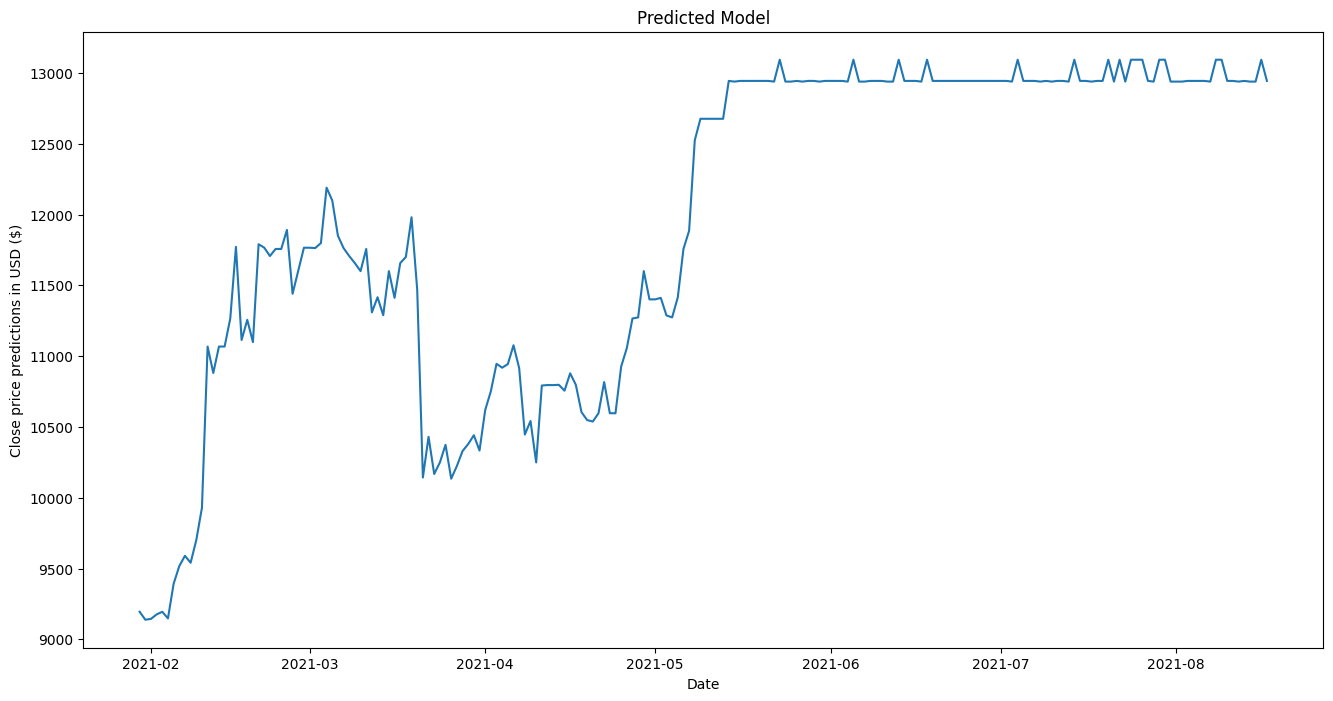

In [18]:
# Visualize the prediction data
plt.figure(figsize=(16,8))
plt.title('Predicted Model')
plt.xlabel('Date')
plt.ylabel('Close price predictions in USD ($)')
plt.plot(predictions['Predictions'])
plt.show()

Buy price and date
            Predictions
date                   
2021-01-31   9138.33689
Sell price and date
            Predictions
date                   
2021-01-30  9194.763333


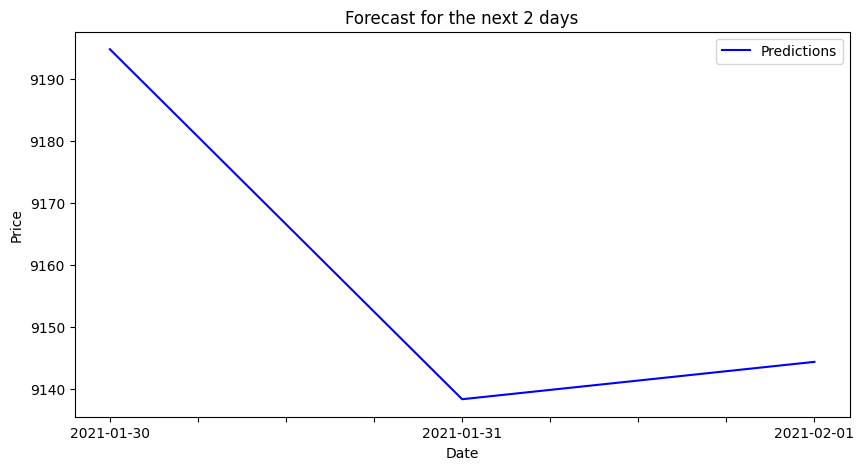

In [19]:
twodays_df = pd.read_csv("two-days-prediction.csv")
twodays_df.set_index("date", inplace=True)
buy_price = min(twodays_df["Predictions"])
sell_price = max(twodays_df["Predictions"])
fivedays_buy = twodays_df.loc[twodays_df["Predictions"] == buy_price]
fivedays_sell = twodays_df.loc[twodays_df["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)

twodays_df["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 2 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### Linear Regression Model

In [20]:
# Set the X and the Y to train and test data
x = df.loc[:, df.columns != 'close_USD']
y = df['close_USD']
# Splitting the datasets into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=False, train_size=0.2, random_state=random_seed)

In [14]:
print("X_train:\t")
print(X_train)
print("----------")
print("X_test:")
print(X_test)
print("----------")
print("y_train:")
print(y_train)
print("----------")
print("y_test:")
print(y_test)
print()
print("Ratio of 1 in y in train: {0:.2f}%".format(sum(y_train)/len(y_train)*100))
print("Ratio of 1 in y in test: {0:.2f}%".format(sum(y_test)/len(y_test)*100))

X_train:	
                open_SAR  open_USD      high_SAR  high_USD       low_SAR  \
date                                                                       
2019-11-05  35225.256960   9392.40  35459.844480   9454.95  34412.770304   
2019-11-04  34490.403584   9196.46  35680.105472   9513.68  34188.046336   
2018-07-24  28959.276160   7721.65  31825.894400   8486.00  28863.078400   
2018-06-01  28071.781504   7485.01  28535.105920   7608.55  27586.217216   
2020-02-20  35983.775360   9594.65  36375.129600   9699.00  35253.760000   
...                  ...       ...           ...       ...           ...   
2018-07-20  28011.212544   7468.86  28878.080000   7700.00  27276.659200   
2018-06-17  24311.968000   6482.50  24711.498112   6589.03  24085.068800   
2019-12-17  25845.656576   6891.44  26036.064384   6942.21  24602.624000   
2020-10-17  42451.677696  11319.24  42763.635968  11402.42  42210.752000   
2019-04-03  18216.405376   4857.19  19783.397504   5275.01  17827.526400   

 

In [23]:
# Create Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Use model to make predictions
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score


# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [-2.10100857e-16 -5.55111512e-17  5.55111512e-17 -8.67361738e-17
  1.11022302e-16  2.77555756e-17  2.66638225e-01  3.46944695e-18]
Mean Absolute Error: 1.8036416804534383e-12
Coefficient of Determination: 1.0


In [27]:
predictions_lr = pd.DataFrame({"Predictions": y_pred}, index=pd.date_range(start=df.index[0], periods=len(y_pred), freq="D"))
predictions_lr.index.name = 'date'
predictions_lr

,Predictions
date,
2018-05-07,4420.61
2018-05-08,3932.44
2018-05-09,4085.78
2018-05-10,3862.20
2018-05-11,3875.21
...,...
2020-07-10,32467.77
2020-07-11,30366.15
2020-07-12,33364.86


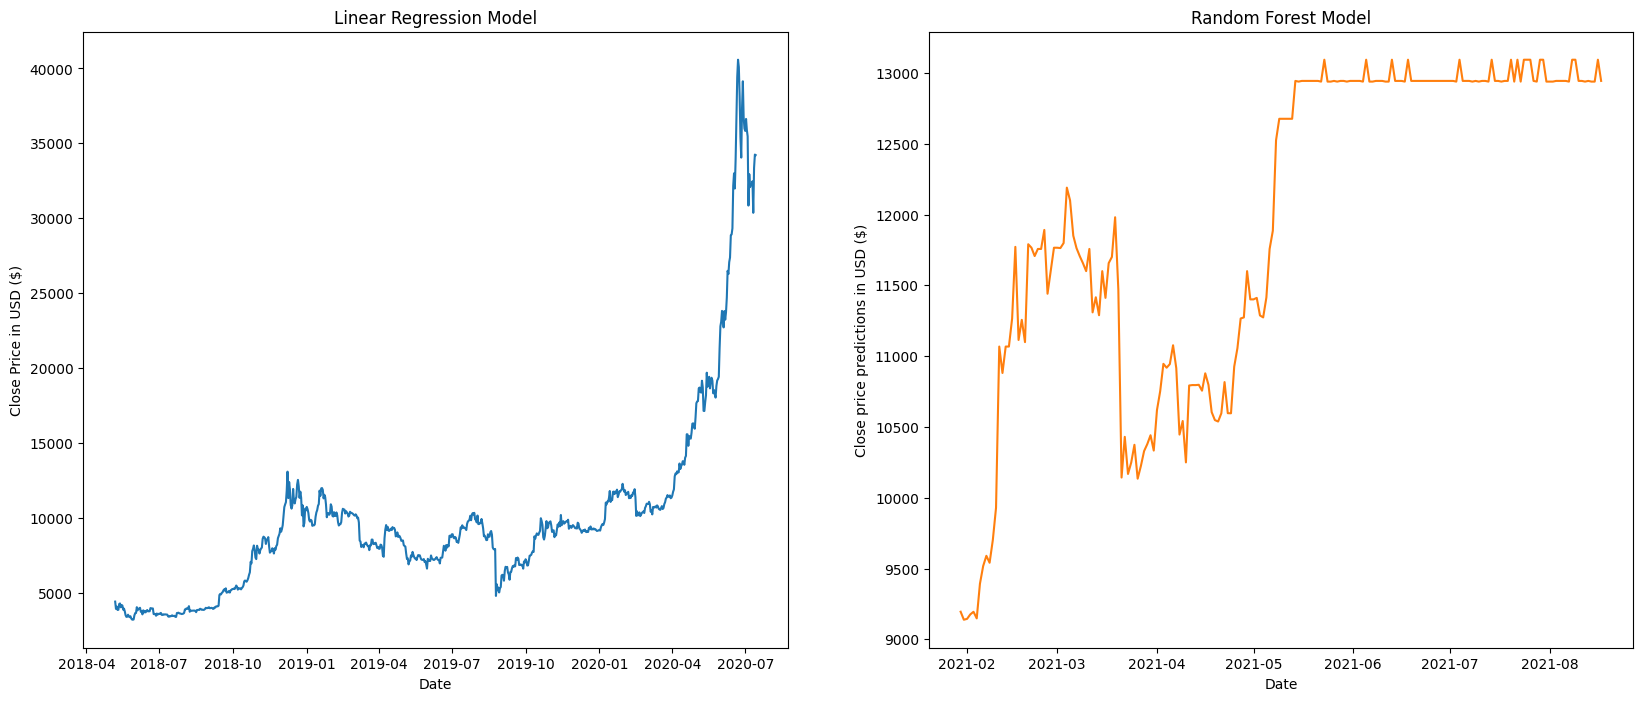

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

ax1.set_title('Linear Regression Model')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price in USD ($)')
ax1.plot(predictions_lr)

ax2.set_title('Random Forest Model')
ax2.set_xlabel('Date')
ax2.set_ylabel('Close price predictions in USD ($)')
ax2.plot(predictions['Predictions'], 'tab:orange')